**Project Objective**

Build a chess blunder prediction algorihtm.

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Chess Project
%ls

/content/drive/MyDrive/Chess Project
'Chess Project.ipynb'    games.csv        'Project Instructions.pdf'
 data_with_blunder.csv   Literature.gdoc  '(redacted)_Project_Choice_1_Sample.pdf'


In [ ]:
!pip install chess

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 43.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for chess: filename=chess-1.11.2-py3-none-any.whl size=147776 sha256=8193b5686f07ae66dbd41a7401c487318bb6cde73105711e277b6a57f79315a0
  Stored in directory: /root/.cache/pip/wheels/fb/5d/5c/59a62d8a695285e59ec9c1f66add6f8a9ac4152499a2be0113
Successfully built chess


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('games.csv')

In [ ]:
data.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [ ]:
data.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483617e+12,1.483618e+12,60.465999,1596.631868,1588.831987,4.816981
std,2.850151e+10,2.850140e+10,33.570585,291.253376,291.036126,2.797152
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000
25%,1.477548e+12,1.477548e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.496010e+12,1.496010e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.503170e+12,1.503170e+12,79.000000,1793.000000,1784.000000,6.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000


In [ ]:
data.isna().sum()

,0
id,0
rated,0
created_at,0
last_move_at,0
turns,0
victory_status,0
winner,0
increment_code,0
white_id,0
white_rating,0


<Axes: ylabel='Frequency'>

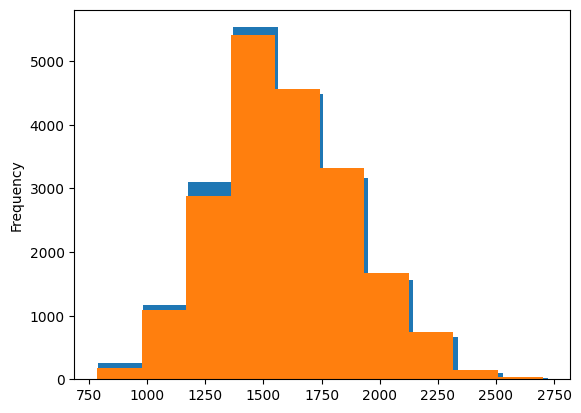

In [ ]:
import matplotlib
data['black_rating'].plot(kind='hist')
data['white_rating'].plot(kind='hist')

<Axes: ylabel='Frequency'>

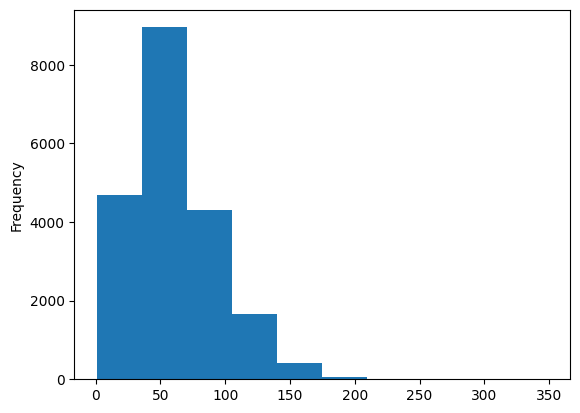

In [ ]:
data['turns'].plot(kind='hist')

In [ ]:
incre = data['increment_code'].value_counts()
incre[incre > 100]

,count
increment_code,
10+0,7721
15+0,1311
15+15,850
5+5,738
5+8,697
8+0,588
10+5,579
15+10,461
20+0,448


Data CLeaning

In [ ]:
def isRapid(time):
  return time == '10+0' or time == '10+5' or time == '15+10'
def data_cleaning(df):
  new_df = df[['id','rated','increment_code', 'white_rating', 'black_rating','moves']]
  new_df = new_df[new_df['rated'] == True]
  new_df = new_df[(new_df['increment_code'] == '10+0') | \
                  (new_df['increment_code'] == '10+5') | \
                  (new_df['increment_code'] == '15+10')]
  new_df['average_rating'] = (new_df['white_rating'] + new_df['black_rating'])/2
  new_df = new_df[['moves','average_rating','increment_code']]
  new_df = new_df[(new_df['average_rating'] > 1500) &
                  (new_df['average_rating'] < 1700)]
  return new_df
cleaned_data = data_cleaning(data)

In [ ]:
cleaned_data['increment_code'].value_counts()

,count
increment_code,
10+0,1968
10+5,114
15+10,101


In [ ]:
import pandas as pd
import chess
import chess.pgn

def simulate_game(data):
    chess_notation = data['moves']
    board = chess.Board()
    castled_white = False
    castled_black = False

    game_data = []

    moves = chess_notation.split()

    for move_number, move in enumerate(moves[:64]):
        chess_move = board.push_san(move)

        if not castled_white and board.has_castling_rights(chess.WHITE) == False:
            castled_white = True
        if not castled_black and board.has_castling_rights(chess.BLACK) == False:
            castled_black = True

        is_white_move = move_number % 2 == 0

        game_data.append({
            'board_position': board.fen(),
            'move_number': move_number + 1,
            'white_castled': castled_white,
            'black_castled': castled_black,
            'white_move': is_white_move,
            'average_rating' : data['average_rating'],
            'increment_code' : data['increment_code']
        })

    return game_data

game_data = []
for index, row in cleaned_data.iterrows():
    game_data.extend(simulate_game(row))

fen_df = pd.DataFrame(game_data)
fen_df.head()

,board_position,move_number,white_castled,black_castled,white_move,average_rating,increment_code
0,rnbqkbnr/pppppppp/8/8/3P4/8/PPP1PPPP/RNBQKBNR ...,1,False,False,True,1578.5,15+10
1,rnbqkb1r/pppppppp/5n2/8/3P4/8/PPP1PPPP/RNBQKBN...,2,False,False,False,1578.5,15+10
2,rnbqkb1r/pppppppp/5n2/8/3P1B2/8/PPP1PPPP/RN1QK...,3,False,False,True,1578.5,15+10
3,rnbqkb1r/pp1ppppp/5n2/2p5/3P1B2/8/PPP1PPPP/RN1...,4,False,False,False,1578.5,15+10
4,rnbqkb1r/pp1ppppp/5n2/2p5/3P1B2/4P3/PPP2PPP/RN...,5,False,False,True,1578.5,15+10


In [ ]:
!apt-get install stockfish
!pip install stockfish



Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Suggested packages:
  polyglot xboard | scid
The following NEW packages will be installed:
  stockfish
0 upgraded, 1 newly installed, 0 to remove and 29 not upgraded.
Need to get 24.8 MB of archives.
After this operation, 47.4 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 stockfish amd64 14.1-1 [24.8 MB]
Fetched 24.8 MB in 2s (11.3 MB/s)
Selecting previously unselected package stockfish.
(Reading database ... 124947 files and directories currently installed.)
Preparing to unpack .../stockfish_14.1-1_amd64.deb ...
Unpacking stockfish (14.1-1) ...
Setting up stockfish (14.1-1) ...
Processing triggers for man-db (2.10.2-1) ...


In [ ]:
def is_blunder(previous_eval, current_eval, color):
    prev_type, prev_value = previous_eval['type'], previous_eval['value']
    curr_type, curr_value = current_eval['type'], current_eval['value']

    if prev_type == 'cp' and curr_type == 'cp':
      if abs(prev_value) > 1000 and abs(curr_value) > 1000:
        return False  # No blunder if both are large differences

    if abs(prev_value) < 300 and curr_type == 'mate':
        return True


    if prev_type == 'cp' and curr_type == 'cp':
        eval_diff = abs(prev_value - curr_value)
        if eval_diff >= 300:
            if (color == 'white' and curr_value < prev_value) or (color == 'black' and curr_value > prev_value):
                return True

    return False

1 {'type': 'cp', 'value': 36}
2 {'type': 'cp', 'value': 34}
3 {'type': 'cp', 'value': 11}
4 {'type': 'cp', 'value': 14}
5 {'type': 'cp', 'value': 2}
6 {'type': 'cp', 'value': 23}
7 {'type': 'cp', 'value': 37}
8 {'type': 'cp', 'value': 38}
9 {'type': 'cp', 'value': 26}
10 {'type': 'cp', 'value': 50}
11 {'type': 'cp', 'value': 46}
12 {'type': 'cp', 'value': 46}
13 {'type': 'cp', 'value': 16}
14 {'type': 'cp', 'value': 40}
15 {'type': 'cp', 'value': -8}
16 {'type': 'cp', 'value': 0}
17 {'type': 'cp', 'value': -34}
18 {'type': 'cp', 'value': 6}
19 {'type': 'cp', 'value': -11}
20 {'type': 'cp', 'value': -5}
21 {'type': 'cp', 'value': 8}
22 {'type': 'cp', 'value': 21}
23 {'type': 'cp', 'value': 12}
24 {'type': 'cp', 'value': 21}
25 {'type': 'cp', 'value': 0}
26 {'type': 'cp', 'value': -10}
27 {'type': 'cp', 'value': -27}
28 {'type': 'cp', 'value': -31}
29 {'type': 'cp', 'value': -36}
30 {'type': 'cp', 'value': -41}
31 {'type': 'cp', 'value': -63}
32 {'type': 'cp', 'value': -9}
33 {'type': 'cp', 'value': -25}
34 {'type': 'cp', 'value': 0}
35 {'type': 'cp', 'value': -74}
36 {'type': 'cp', 'value': -49}
37 {'type': 'cp', 'value': -100}
38 {'type': 'cp', 'value': -30}
39 {'type': 'cp', 'value': -49}
40 {'type': 'cp', 'value': -12}
41 {'type': 'cp', 'value': -136}
42 {'type': 'cp', 'value': -25}
43 {'type': 'cp', 'value': -31}
44 {'type': 'cp', 'value': -28}
45 {'type': 'cp', 'value': -21}
46 {'type': 'cp', 'value': -2}
47 {'type': 'cp', 'value': -150}
48 {'type': 'cp', 'value': -86}
49 {'type': 'cp', 'value': -130}
50 {'type': 'cp', 'value': -15}
51 {'type': 'cp', 'value': -119}
52 {'type': 'cp', 'value': 62}
53 {'type': 'cp', 'value': 42}
54 {'type': 'cp', 'value': 64}
55 {'type': 'cp', 'value': 37}
56 {'type': 'cp', 'value': 537}
57 {'type': 'cp', 'value': 576}

In [ ]:
fen_df.iloc[54]['board_position']
fen_df.iloc[55]['board_position']
print(fen_df.shape)

(110073, 8)


In [ ]:
# Create an instance of the Stockfish class
from stockfish import Stockfish

fen_df['next_move_blunder'] = [False] * len(fen_df)

# Specify the path to the Stockfish binary
stockfish = Stockfish(path="/usr/games/stockfish",depth=12)
pre_eval = 0
counter = 0
for index, row in fen_df.iterrows():
    fen_notation = row['board_position']  # Assuming 'moves' column contains the chess moves in SAN
    stockfish.set_fen_position(fen_notation)
    evaluation = stockfish.get_evaluation()
    if row['move_number'] != 1:
      # print(row['move_number'], evaluation)
      # print(row['move_number'], )
      fen_df.at[counter - 1, 'next_move_blunder'] = is_blunder(pre_eval, evaluation, 'white' if row['move_number'] % 2 == 1 else 'black')
    pre_eval = evaluation
    counter += 1
    if(counter % 1000 == 0):
        print(counter)
fen_df.to_csv('data_with_blunder.csv', index=False)

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000


In [ ]:
fen_df.shape

(110073, 8)

In [ ]:
fen_df['next_move_blunder'].value_counts()

,count
next_move_blunder,
False,100960
True,9113


In [ ]:
print(fen_df.iloc[54]['next_move_blunder'])
print(fen_df.iloc[55]['next_move_blunder'])
print(fen_df.iloc[56]['next_move_blunder'])
print(fen_df.iloc[57]['next_move_blunder'])


True
False
False
False
